In [230]:
import numpy as np
import matplotlib.pyplot as plt

# boltzmann constant in units of (kcal/mol)/K
boltzmann = 1.987204259*10**-3
FONTSIZE = 20

# helper functions
def running_mean(x, N=1000):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)
   
def jarzynski(forces, velocity=1.0, dt=0.1, T=300.0):
    beta = 1/(boltzmann*T)
    work = velocity*dt*np.cumsum(forces)
    dG = -(1/beta)*np.log(np.exp(work*-beta))
    return dG

## Load the data

In [250]:
# your simulation
timestep, distance, force = np.genfromtxt("da_smd_tcl.out").T
# 10 repeat simulations using a slower pulling speed 
longtime_data = np.genfromtxt("da.dat").T
timestep_long = longtime_data[0]
distances_long = longtime_data[range(1,11)]
forces_long = longtime_data[range(11,21)]
# even slower pulling speed experiments
exact_data = np.genfromtxt("Fexact.dat")

In [251]:
pulling_velocity = 1
dt = 0.1
pulling_displacement = distance[0]+timestep*pulling_velocity

## Graph the end-to-end distance versus time

Text(0.5, 0, 'Time [ps]')

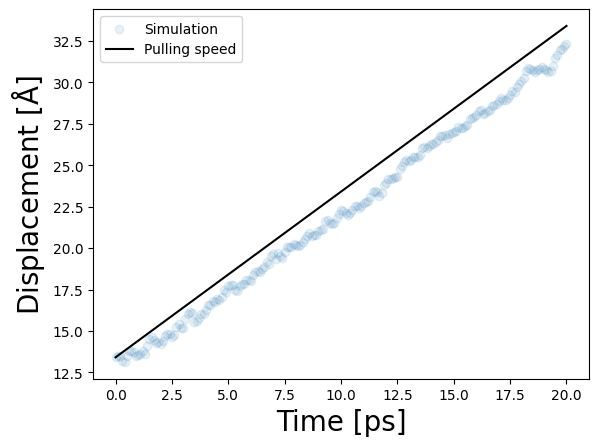

In [249]:
plt.scatter(timestep, distance, alpha=0.1, label="Simulation")
plt.plot(timestep, pulling_displacement, label="Pulling speed", color="k")
plt.legend()
plt.ylabel("Displacement [$\mathrm{\AA}$]", fontsize=FONTSIZE)
plt.xlabel("Time [ps]", fontsize=FONTSIZE)

## Graph Force versus end-to-end distance

Text(0, 0.5, 'Force [$\\mathrm{\\AA}$/ps]')

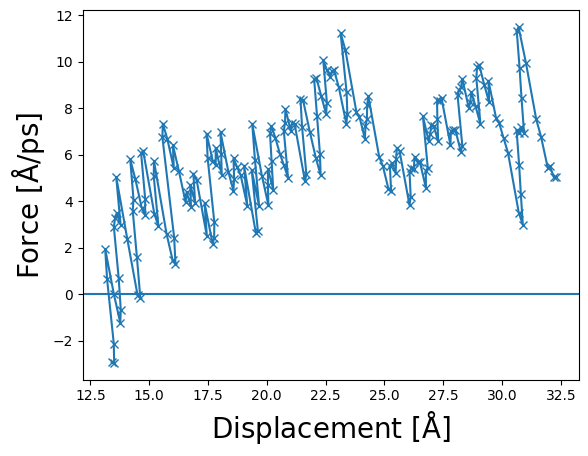

In [246]:
plt.plot(distance, force, "-x")
plt.axhline(0)
plt.xlabel("Displacement [$\mathrm{\AA}$]", fontsize=FONTSIZE)
plt.ylabel("Force [$\mathrm{\AA}$/ps]", fontsize=FONTSIZE)

## Graph the number of hydrogen bonds versus time

Text(0, 0.5, 'Number of H-bonds')

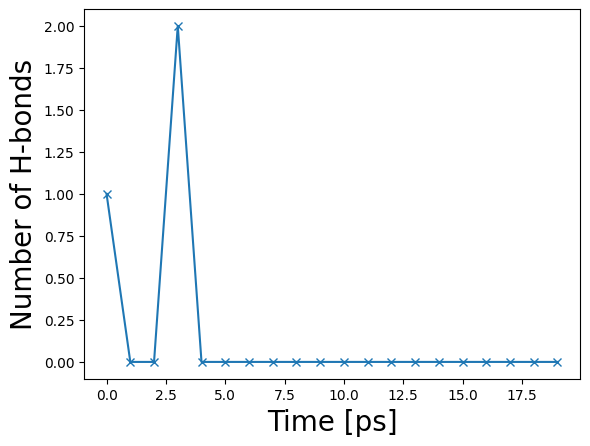

In [248]:
# load the H bonds data
time_hbonds, n_hbonds = np.genfromtxt("Hbonds.dat").T
# plot H bonds as a function of time
plt.plot(time_hbonds, n_hbonds, "-x")
plt.xlabel("Time [ps]", fontsize=FONTSIZE)
plt.ylabel("Number of H-bonds", fontsize=FONTSIZE)

Text(0, 0.5, '$\\Delta$F [kcal/mol]')

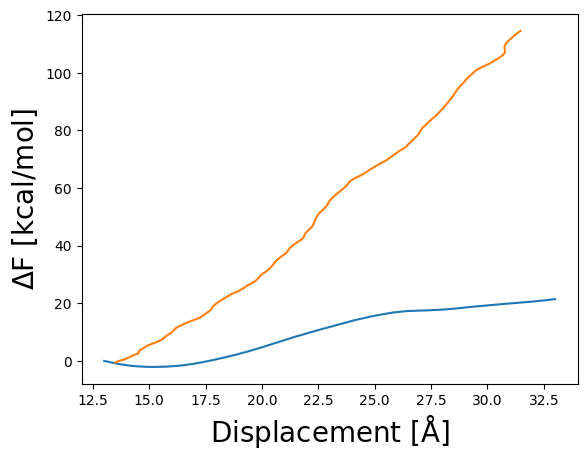

In [247]:
dG_short = jarzynski(force)

plt.plot(*exact_data.T)
plt.plot(running_mean(distance, N=10), running_mean(dG_short, N=10))

plt.xlabel("Displacement [$\mathrm{\AA}$]", fontsize=FONTSIZE)
plt.ylabel("$\Delta$F [kcal/mol]", fontsize=FONTSIZE)

# Analyse 10 trajectories from a slower pulling speed

Text(0.5, 0, 'Time [ps]')

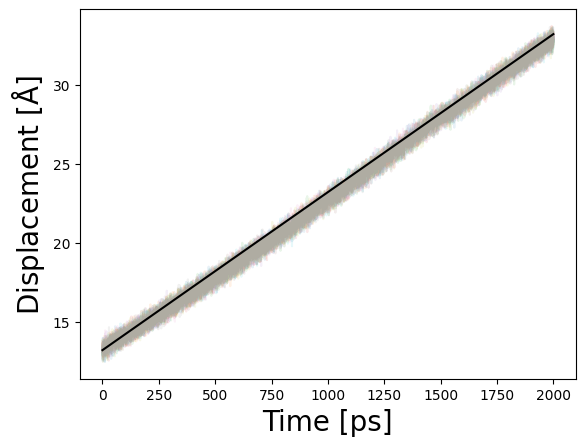

In [238]:
pulling_velocity_slower = 0.01
for i in range(10):
    plt.plot(timestep_long, distances_long[i], alpha=0.1)
plt.plot(timestep_long, distances_long[0][0]+timestep_long*pulling_velocity_slower, label="Pulling speed", color="k")
plt.ylabel("Displacement [$\mathrm{\AA}$]", fontsize=FONTSIZE)
plt.xlabel("Time [ps]", fontsize=FONTSIZE)

Text(0, 0.5, 'Force [$\\mathrm{\\AA}$/ps]')

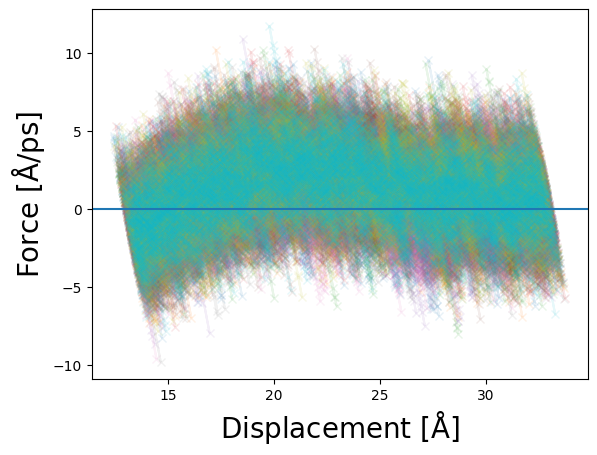

In [239]:
for i in range(10):
    plt.plot(distances_long[i], forces_long[i], "-x", alpha=0.1)
plt.axhline(0)
plt.xlabel("Displacement [$\mathrm{\AA}$]", fontsize=FONTSIZE)
plt.ylabel("Force [$\mathrm{\AA}$/ps]", fontsize=FONTSIZE)

Text(0, 0.5, '$\\Delta$F [kcal/mol]')

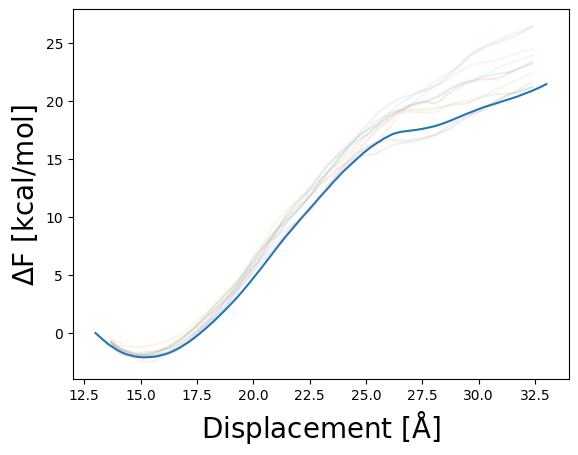

In [240]:
plt.plot(*exact_data.T)

for i in range(10):
    dG = jarzynski(forces_long[i], velocity=pulling_velocity_slower, dt=dt)
    plt.plot(running_mean(distances_long[i]), running_mean(dG), 
                                                           alpha=0.1)
    
plt.xlabel("Displacement [$\mathrm{\AA}$]", fontsize=FONTSIZE)
plt.ylabel("$\Delta$F [kcal/mol]", fontsize=FONTSIZE)

## Compare the Free Energy landscapes as a function of pulling speed

Text(0, 0.5, '$\\Delta$F [kcal/mol]')

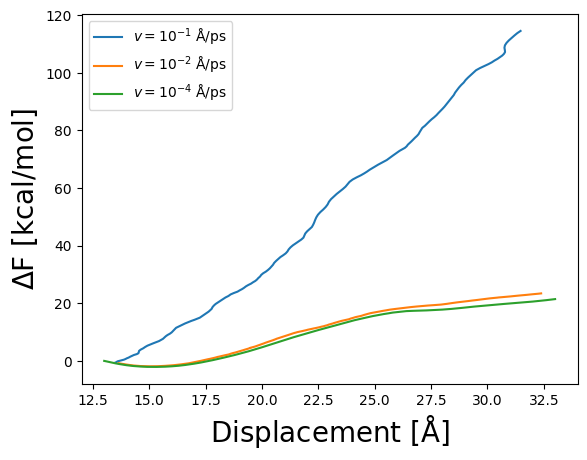

In [241]:
mean_forces = forces_long.mean(axis=0)

plt.plot(running_mean(distance, N=10), running_mean(dG_short, N=10), 
         label="$v = 10^{-1}~\mathrm{\AA}/$ps")

plt.plot(running_mean(distances_long[0]), 
         running_mean(jarzynski(mean_forces, velocity=pulling_velocity_slower, dt=dt)),
         label="$v = 10^{-2}~\mathrm{\AA}/$ps")
        
    
plt.plot(*exact_data.T, label="$v = 10^{-4}~\mathrm{\AA}/$ps")

plt.legend()
plt.xlabel("Displacement [$\mathrm{\AA}$]", fontsize=FONTSIZE)
plt.ylabel("$\Delta$F [kcal/mol]", fontsize=FONTSIZE)